In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from numpy.linalg import inv

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from fitting.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\250113'
data_parent_old =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\250113\data


# Dataset

In [50]:
from experiments.dataset import *
from experiments.dataset import storage_man_swap_dataset
import os 

file_path = os.path.join(expts_path, 'man1_storage_swap_dataset.csv')
# print(os.makedirs(file_path, exist_ok=True))
ds = storage_man_swap_dataset(file_path)
ds.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.660,0.03,0.942926,0.465943,3000,2025-01-21 16:12:51.119011
1,M1-S2,521.230,0.05,1.069160,0.531718,5000,2025-01-21 16:17:17.763411
2,M1-S3,696.980,0.03,1.256963,0.613370,9000,2025-01-21 16:17:39.113328
3,M1-S4,876.380,0.03,1.235632,0.622603,9000,2025-01-21 16:17:54.523998
4,M1-S5,1053.950,0.03,1.882097,0.985547,7500,2025-01-21 16:18:31.141469
5,M1-S6,1245.525,0.03,1.500950,0.732998,13500,2025-01-21 16:32:20.759195
6,M1-S7,1423.275,0.03,2.153588,1.085899,10000,2025-01-21 16:32:02.177572
7,M1-S8,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3


In [34]:
ds.df['freq (MHz)'][:7].array

<PandasArray>
[349.66, 521.23, 696.98, 876.38, 1053.95, 1245.525, 1423.275]
Length: 7, dtype: float64

# Actual experiment data

## Single shot

### With Reset

9841
9640
Unrotated:
Ig -317.012987012987 +/- 66.61013244879133 	 Qg -339.8668831168831 +/- 62.8761287590355 	 Amp g 464.7652441550265
Ie 97.56655844155844 +/- 82.40168279125874 	 Qe -365.3133116883117 +/- 69.58219483308669 	 Amp e 378.11777136602774
Rotated:
Ig -295.58902205230066 +/- 66.61013244879133 	 Qg -358.6797171916765 +/- 62.8761287590355 	 Amp g 464.78383091770365
Ie 119.68280856035342 +/- 82.40168279125874 	 Qe -358.99323593619 +/- 69.58219483308669 	 Amp e 378.41791462988533


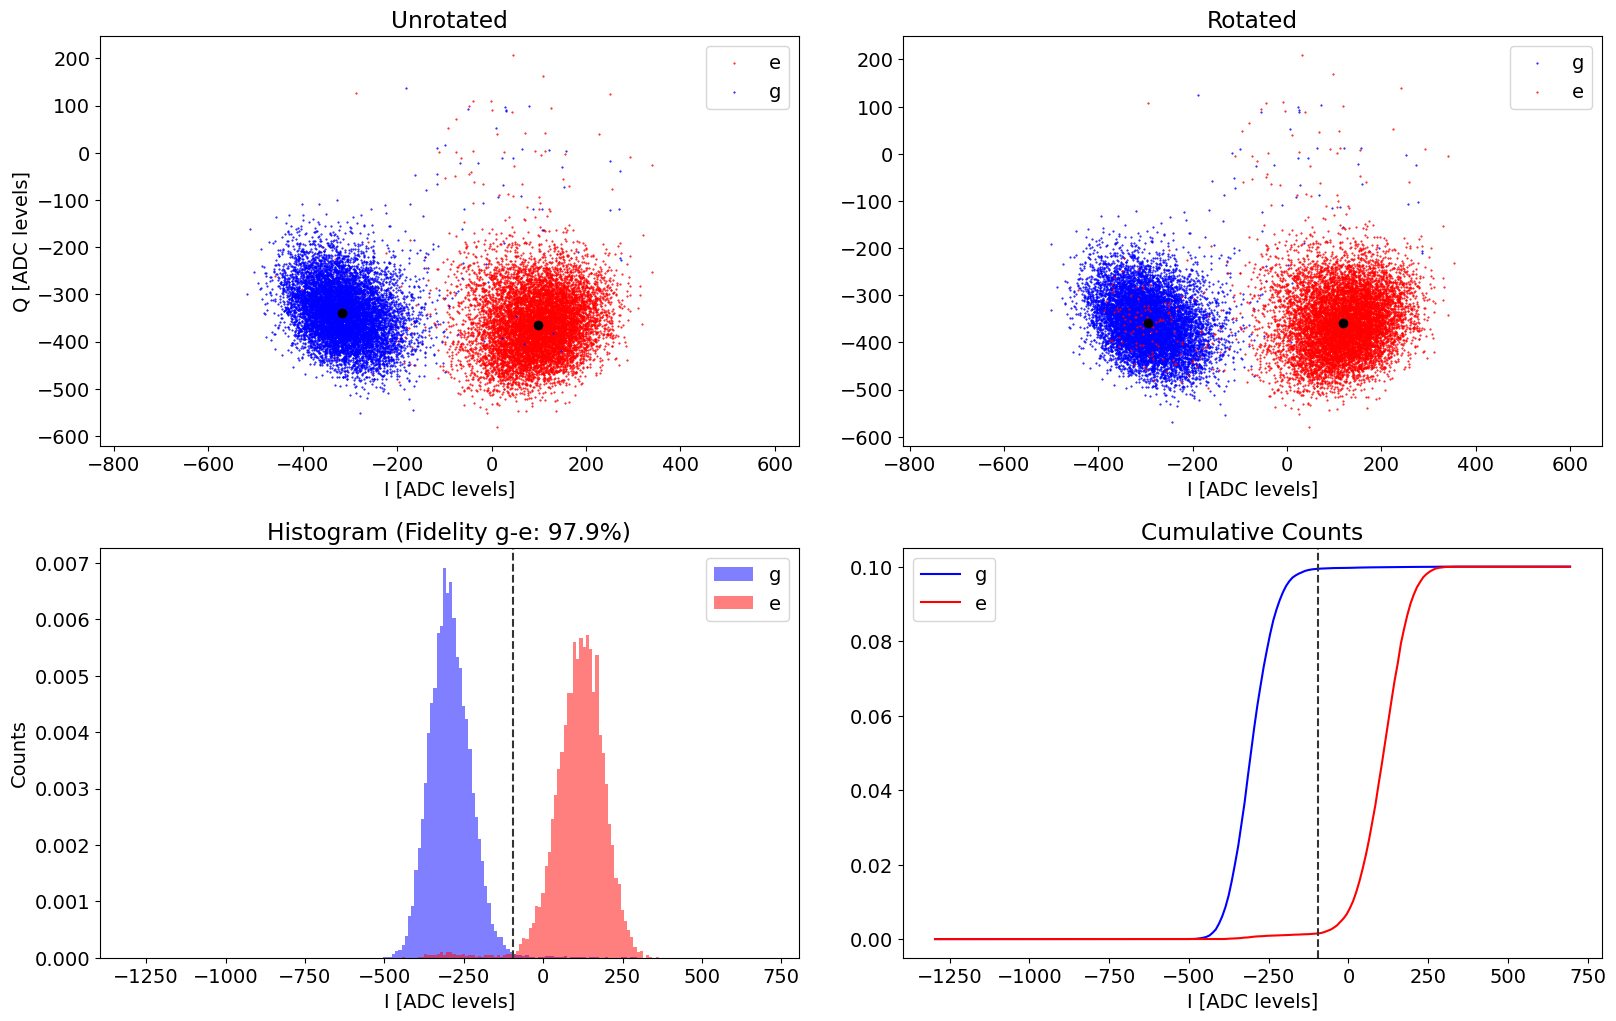

ge fidelity (%): 97.91642931743351
rotation angle (deg): 3.512344489452625
threshold ge: -95.5890220523006
Confusion matrix [Pgg, Pge, Peg, Pee]:  [0.9943095213901028, 0.005690478609897243, 0.015145228215767642, 0.9848547717842323]


In [52]:
temp_data, attrs = prev_data(expt_path, '00029_HistogramExperiment.h5')
threshold = attrs['config']['device']['readout']['threshold'][0]
hist_display(temp_data, verbose=True, plot_f=False, active_reset=True, readout_per_round=4, span=1000, threshold=threshold)#1000)

## Qubit Ramsey ge

### With reset

No echoes in the data
Attempted to init fitparam 1 to 1.9387755102040813, which is out of bounds 0.005154639175257732 to 0.7731958762886597. Instead init to 0.3891752577319587
Current pi pulse frequency: 3568.4939415771046
Fit frequency from I [MHz]: 0.2031695410273751 +/- 0.0013896327347371828
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.490772036077
 	3568.8971111181318
T2 Ramsey from fit I [us]: 35.410253618585664
Fit frequency from Q [MHz]: 0.3217671262301026 +/- 0.03846185034739701
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.3721744508744
 	3569.015708703335
T2 Ramsey from fit Q [us]: 8.692961558273263


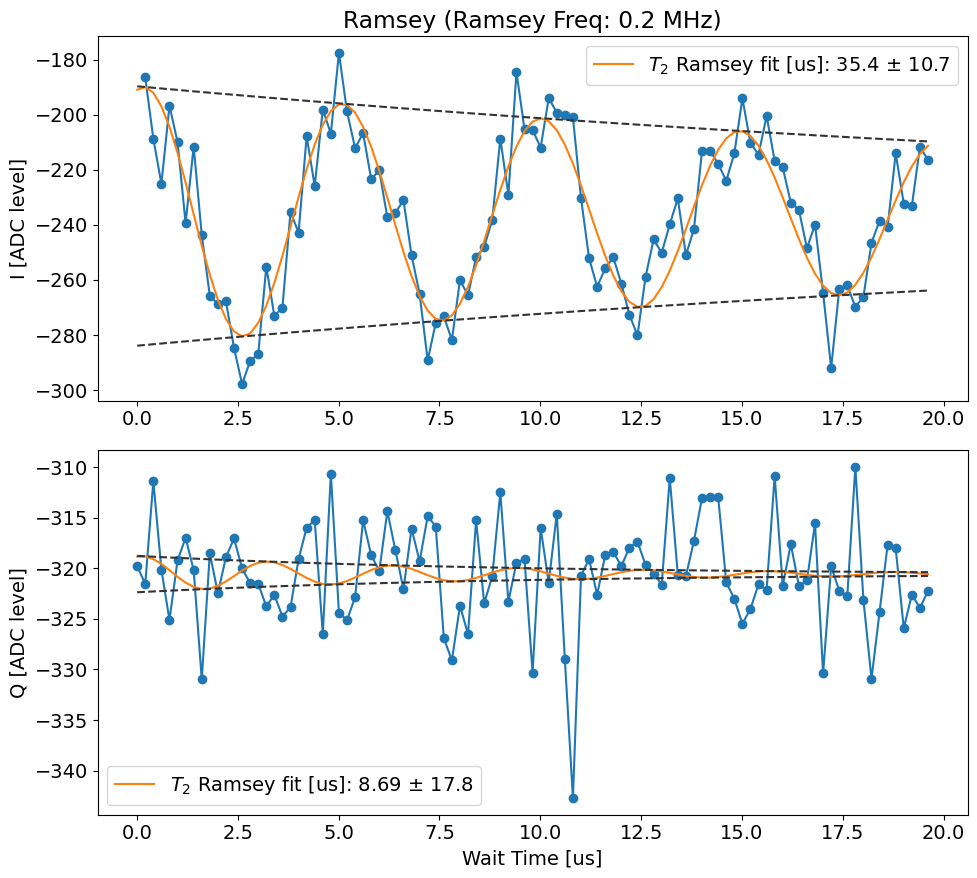

In [54]:
temp_data, attrs = prev_data(expt_path, '00030_RamseyExperiment.h5')
return_args1 = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True, title='Ramsey',
                start_idx=None,
                end_idx = None)

## Lossy Modes

### Manipulate 2 - Lossy Mode

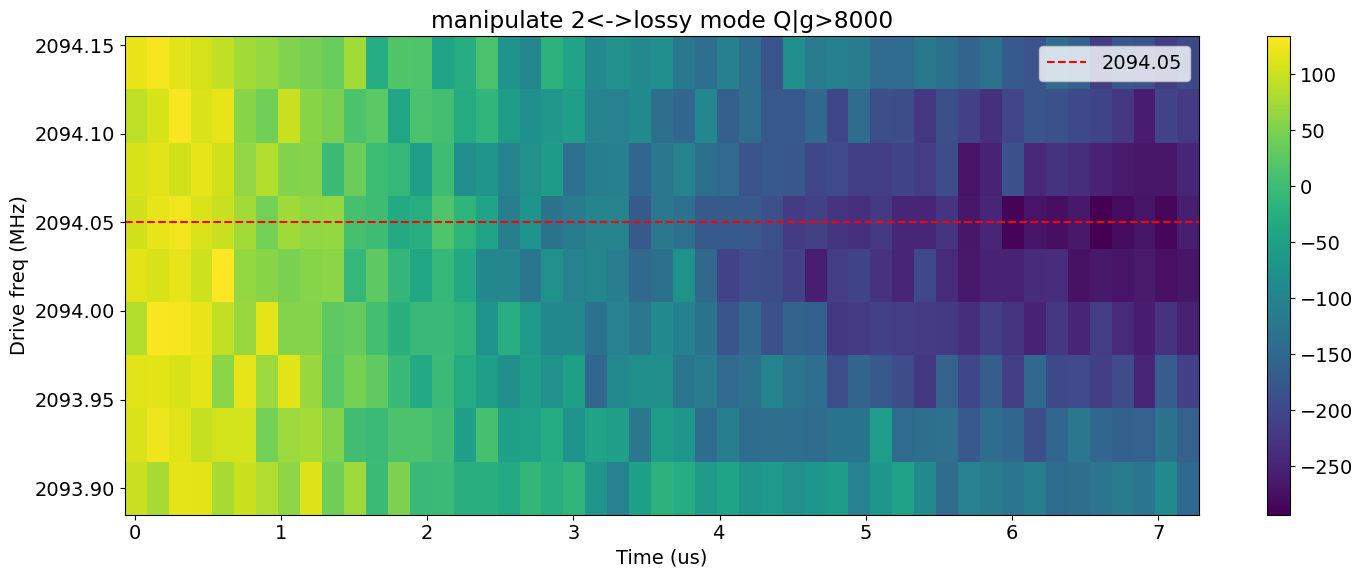

In [45]:

file_list = np.arange(667, 676,1)
# file_list = np.concatenate((np.arange(1120, 1129,1), np.arange(1140, 1144,1)))
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi'][0:-1]
    if attrs['config']['expt']['active_reset']:
        # for each time, post select the single shot data
        Ilist = []
        Qlist = []
        threshold = -4#attrs['config']['expt']['threshold'][0]
        readout_per_round = 4#attrs['config']['expt']['readout_per_round']
        for ii in range(len(temp_data['idata'])-1):
            Ig, Qg = filter_data_IQ(temp_data['idata'][ii], temp_data['qdata'][ii], threshold, readout_per_round)
            Ilist.append(np.mean(Ig))
            Qlist.append(np.mean(Qg))
        
        
        signal_y = Ilist
    #print(len(signal_y))
    
    len_x = temp_data['xpts'][0:-1]
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])
plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[2094.05], vlines=None, title="manipulate 2<->lossy mode Q|g>" + str(attrs['config']['expt']['flux_drive'][2]))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Attempted to init fitparam 1 to 100, which is out of bounds 0.00510204081632653 to 0.7653061224489796. Instead init to 0.385204081632653



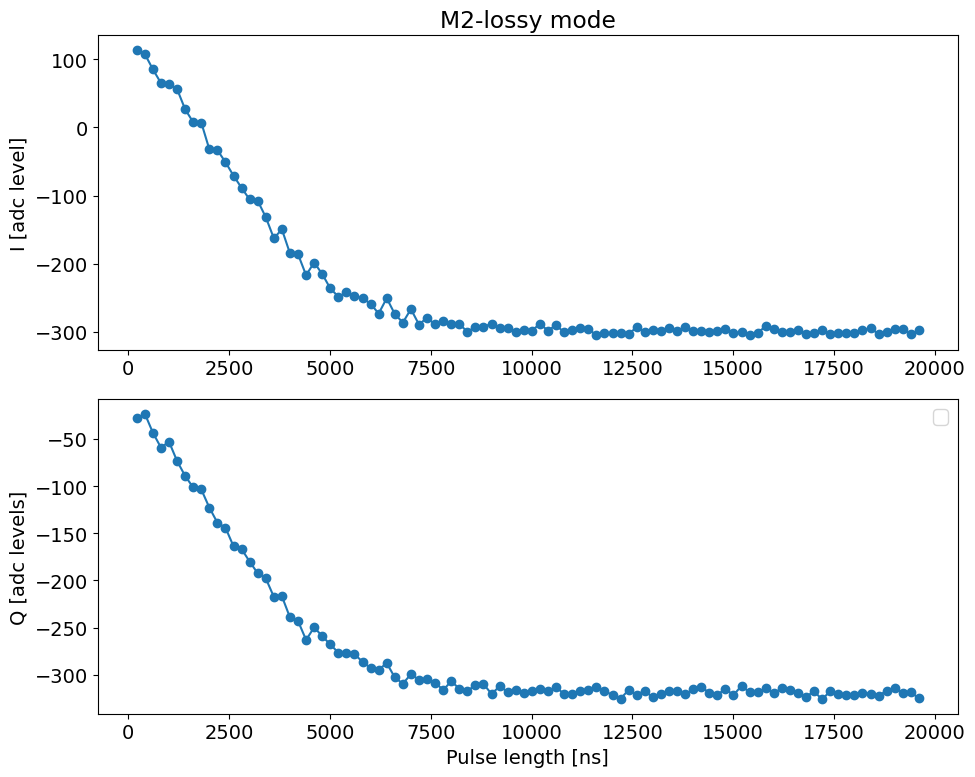

2094.05


In [47]:
#temp_data, attrs = prev_data(expt_path, '00836_sideband_general_sweep.h5')
# temp_data, attrs = prev_data(expt_path, '00055_SidebandGeneralExperiment.h5')
# temp_data, attrs = prev_data(expt_path, '00061_SidebandGeneralExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00004_SidebandGeneralExperiment.h5')

length_rabi_display(temp_data, fit=False, fitparams=[20,100,None,None,None,None ], vlines = [560],
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='M2-lossy mode')
print(attrs['config']['expt']['flux_drive'][1])
#draw vertical lines
# plt.axvline(8000, c='k', ls='--')
# plt.show()

In [48]:
freq = attrs['config']['expt']['flux_drive'][1] 
pi_length =15 #temp_data['pi_length']
pi2_length = 0 #temp_data['pi2_length']
gain = attrs['config']['expt']['flux_drive'][2]

ds.update_all('M2-D2', freq, 0.01, pi_length, pi2_length, gain)

## Finding Chi's

### Bare Ramsey of qubit


No echoes in the data
Attempted to init fitparam 1 to 0.8163265306122448, which is out of bounds 0.005154639175257732 to 0.7731958762886597. Instead init to 0.3891752577319587
Current pi pulse frequency: 3568.497301707094
Fit frequency from I [MHz]: 0.20336012998906797 +/- 0.0002861709356465196
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.4939415771046
 	3568.9006618370827
T2 Ramsey from fit I [us]: 281.79566458432646
Fit frequency from Q [MHz]: 0.3851385912008194 +/- 0.022500708084312128
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.312163115893
 	3569.082440298295
T2 Ramsey from fit Q [us]: 11.669552762826948


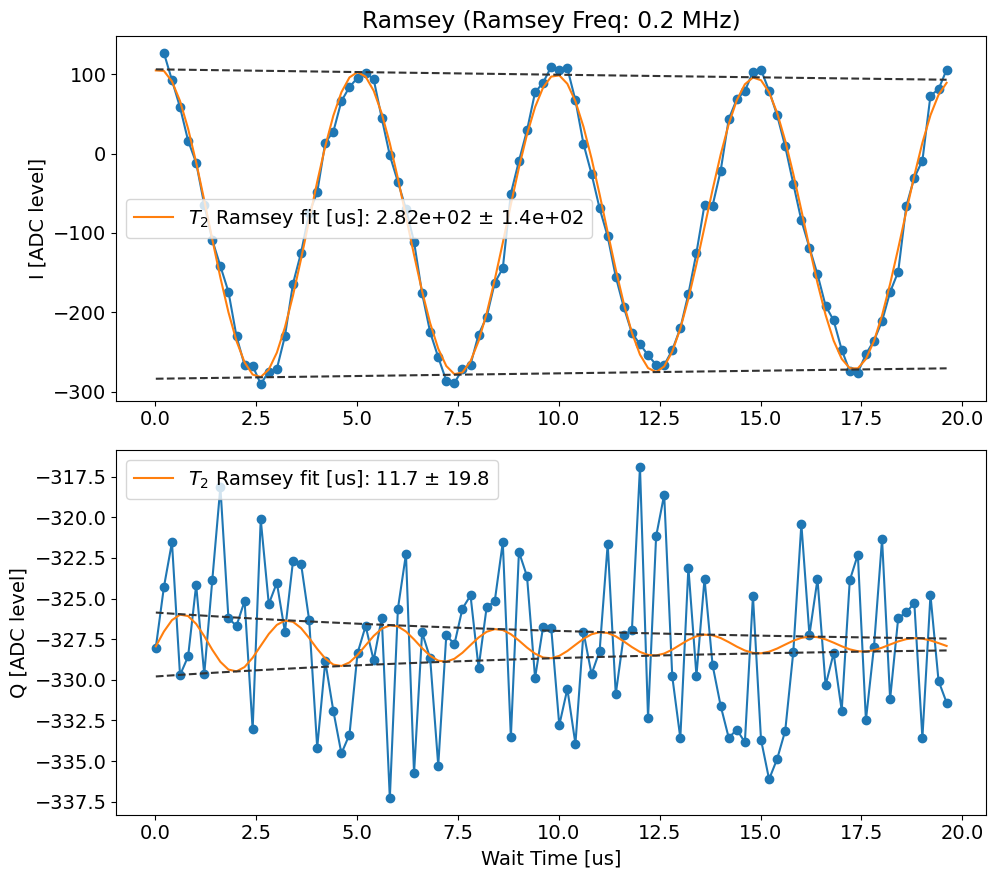

In [9]:
temp_data, attrs = prev_data(expt_path, '00021_RamseyExperiment.h5')
return_args1 = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True, title='Ramsey',
                start_idx=None,
                end_idx = None)

### $\chi_e$

No echoes in the data
Current pi pulse frequency: 3568.4939415771046
Fit frequency from I [MHz]: 0.4901125302876254 +/- 0.00031162270322685387
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.2038290468167
 	3569.184054107392
T2 Ramsey from fit I [us]: 120.24193402373842
Fit frequency from Q [MHz]: 0.47785208364138126 +/- 0.01149303083593982
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.216089493463
 	3569.171793660746
T2 Ramsey from fit Q [us]: 9.698780631392811


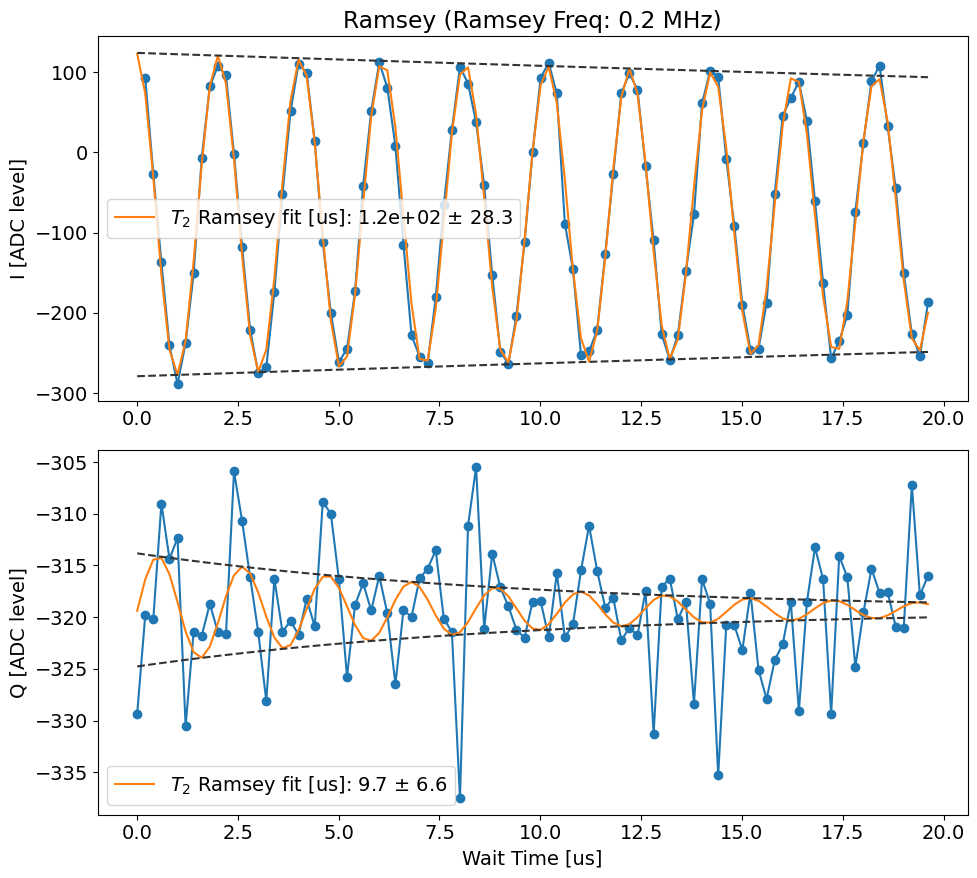

In [11]:
temp_data, attrs = prev_data(expt_path, '00022_RamseyExperiment.h5')
r = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -4.323194812977462, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True, title='Ramsey')

In [14]:
chi_e = 0.4901125302876254 - 0.2
print(r'$\chi_e$: MHz', chi_e)  

$\chi_e$: MHz 0.2901125302876254


#### Calibrating ge pulse with M1 in $|1\rangle$

No echoes in the data
Attempted to init fitparam 1 to 0.8163265306122448, which is out of bounds 0.005154639175257732 to 0.7731958762886597. Instead init to 0.3891752577319587
Current pi pulse frequency: 3568.4939415771046
Fit frequency from I [MHz]: 0.2001946321173102 +/- 0.0002919344052218226
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.4937469449874
 	3568.894136209222
T2 Ramsey from fit I [us]: 139.16132668264405
Fit frequency from Q [MHz]: 0.3685063665999934 +/- 0.02593741305639082
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.3254352105046
 	3569.0624479437047
T2 Ramsey from fit Q [us]: 5.820000000000001


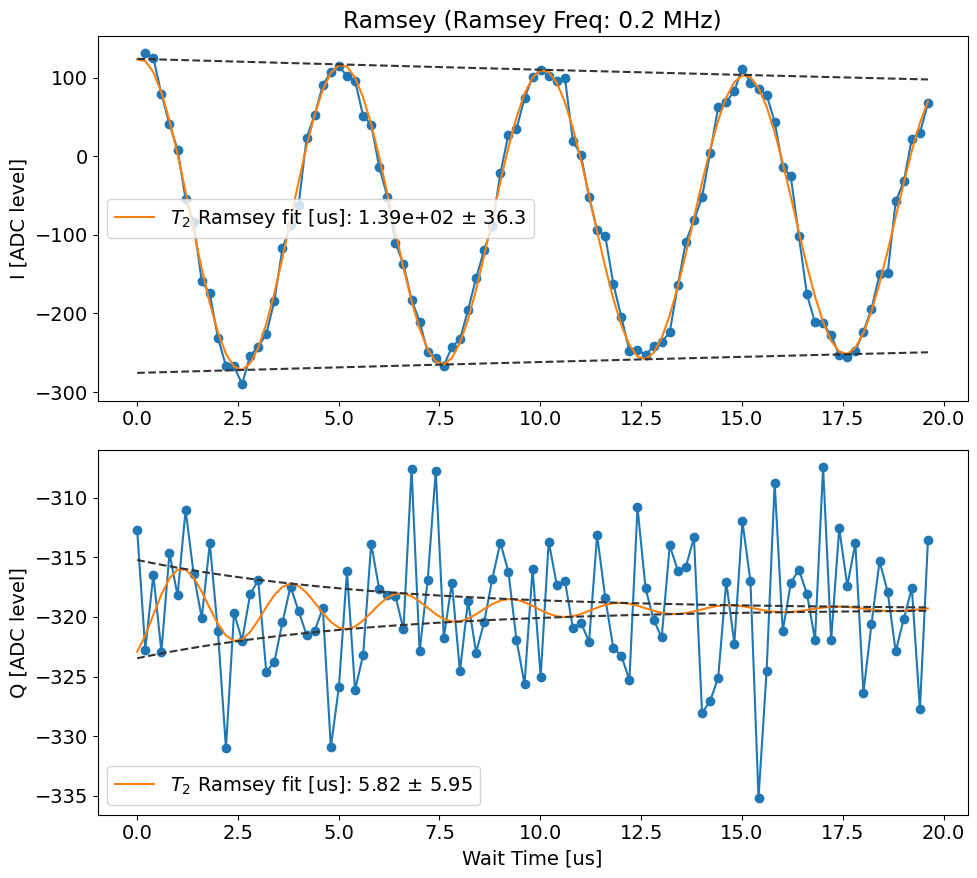

In [15]:
temp_data, attrs = prev_data(expt_path, '00023_RamseyExperiment.h5')
r = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -4.323194812977462, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True, title='Ramsey')

In [ ]:
# prepulse for measuring ef chi shift
[[3568.497301707094, 3425.2997709216247, 2007.54, 3568.203829046816],
 [10973, 9530, 15000, 10376],    
 [0, 0, 0.6164057205175526, 0],
 [0, 0, 0, 0],
 [2, 2, 0,2],
 ['g', 'g', 'flat_top', 'g'],
 [0.035, 0.035, 0.005, 0.035]]

#### Calibrating amplitude of ge pulse  with man |1>

Attempted to init fitparam 4 to -94.57385194805195, which is out of bounds -332.94112554112553 to -307.0623484848485. Instead init to -320.001737012987
Attempted to init fitparam 4 to -320.001737012987, which is out of bounds 307.6811621372649 to 437.4184342230719. Instead init to 372.5497981801684
Pi gain from avgi data [dac units]: 10376
	Pi/2 gain from avgi data [dac units]: 4946
Pi gain from avgq data [dac units]: 159975
	Pi/2 gain from avgq data [dac units]: 104100


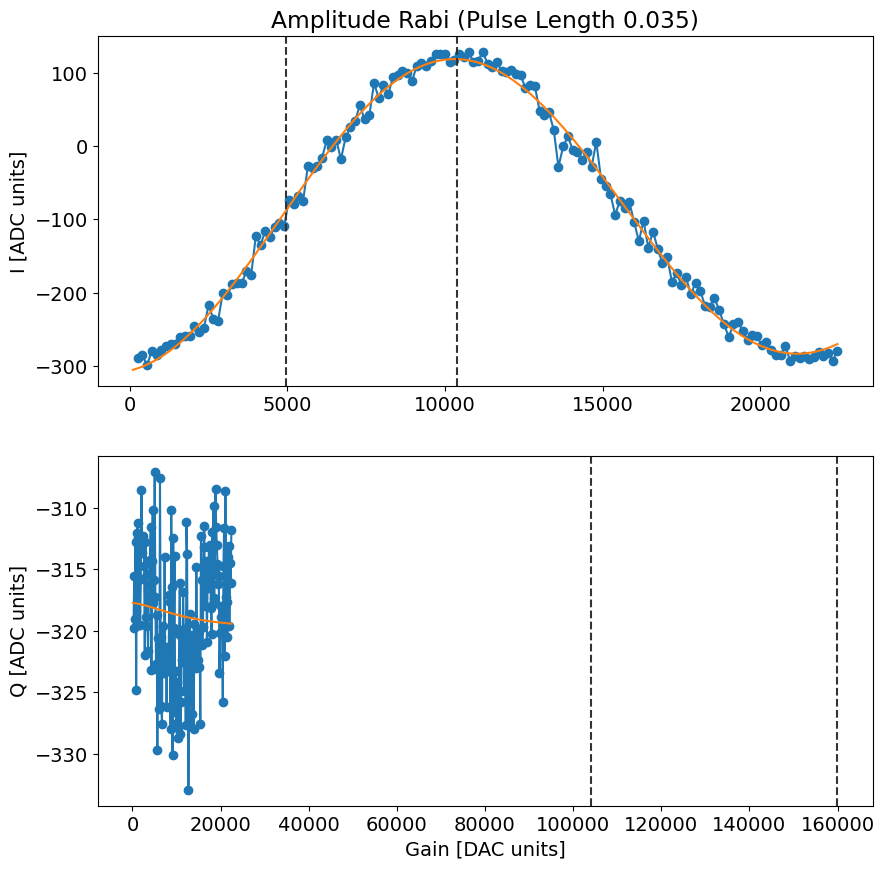

In [17]:
temp_data, attrs = prev_data(expt_path, '00004_AmplitudeRabiExperiment.h5')
# [amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
amp_display(temp_data, sigma= attrs['config']['expt']['sigma_test'], fit=True, fitparams=[500,0.00001,None,None,None,None])

### Bare Ramsey of ef

No echoes in the data
Current pi pulse frequency: 3425.2997709216247
Fit frequency from I [MHz]: 0.23808963261633503 +/- 0.021669781254938895
Suggested new pi pulse frequency from fit I [MHz]:
 	3425.2616812890083
 	3425.7378605542413
T2 Ramsey from fit I [us]: 5.820000000001189
Fit frequency from Q [MHz]: 0.20561211454238132 +/- 0.0009390680095630739
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3425.294158807082
 	3425.705383036167
T2 Ramsey from fit Q [us]: 22.307280618002196


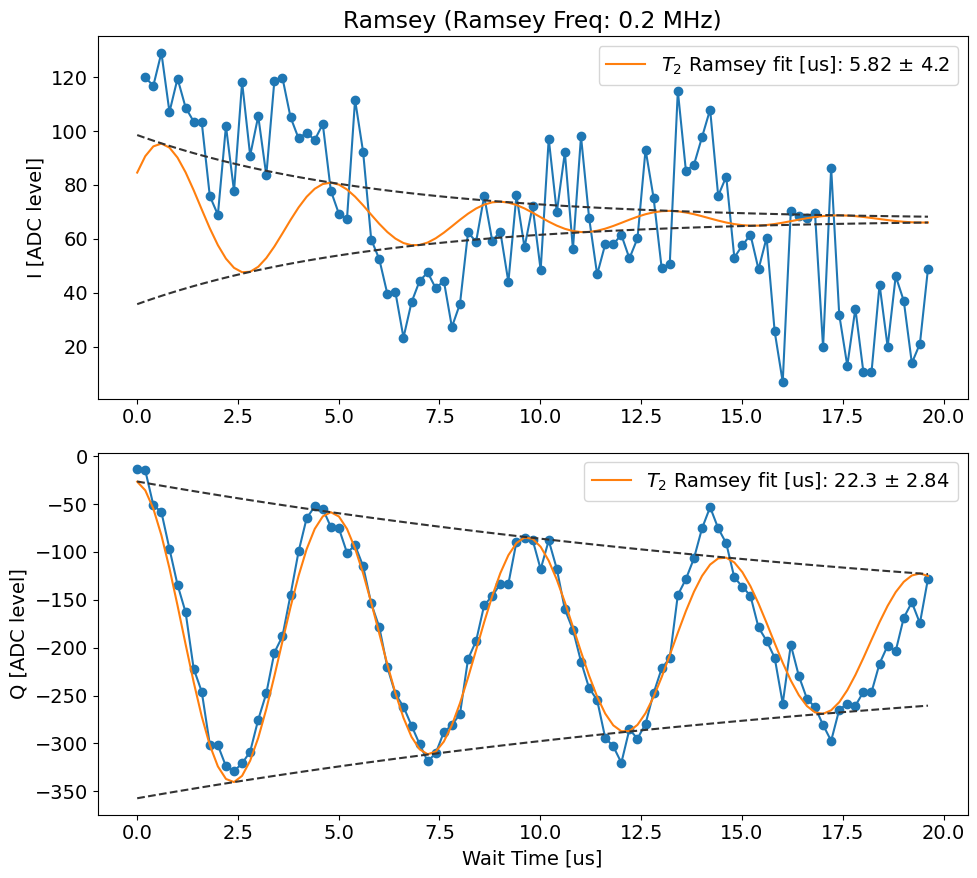

In [20]:
temp_data, attrs = prev_data(expt_path, '00027_RamseyExperiment.h5')
r = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -4.323194812977462, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ef'][0], fit=True, title='Ramsey')

### $\chi_{f} $

ef ramsey in presence of 1 photon in M1

No echoes in the data
Current pi pulse frequency: 3568.4939415771046
Fit frequency from I [MHz]: 0.005154639175257733 +/- 0.1451527913418826
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.6887869379293
 	3568.69909621628
T2 Ramsey from fit I [us]: 8.617646529938535
Fit frequency from Q [MHz]: 0.459501381825939 +/- 0.0009967992622796735
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.2344401952787
 	3569.1534429589306
T2 Ramsey from fit Q [us]: 17.369168664444707


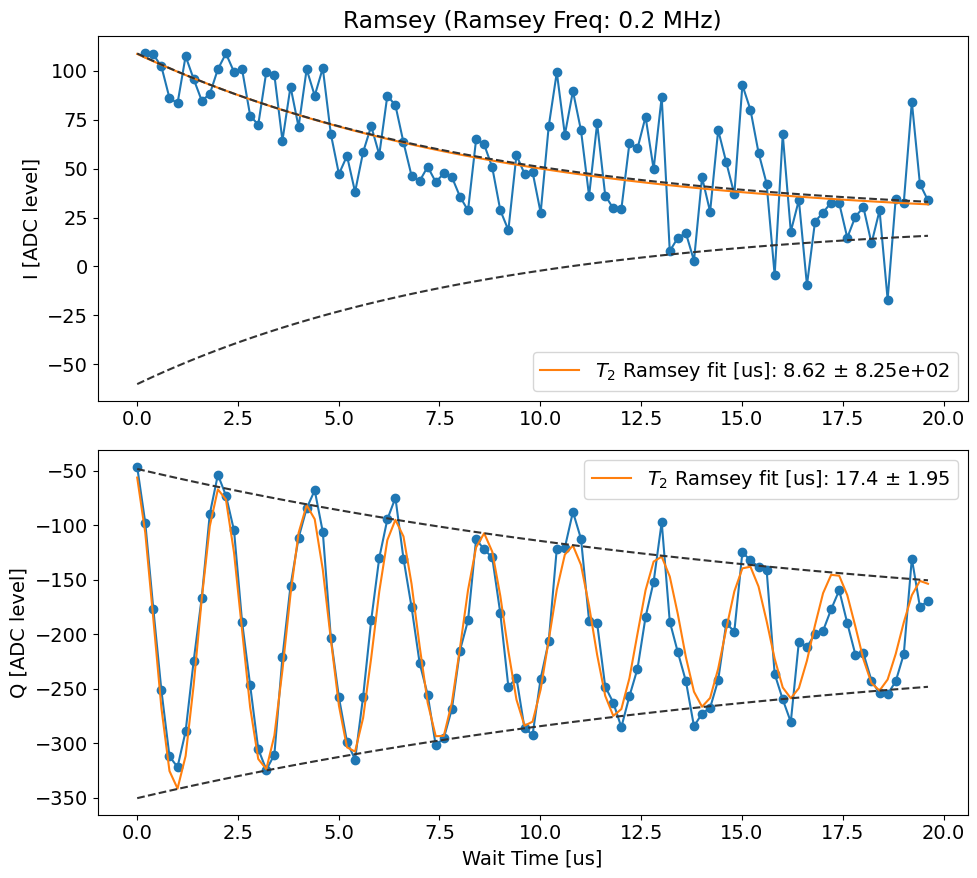

In [18]:
temp_data, attrs = prev_data(expt_path, '00026_RamseyExperiment.h5')
r = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -4.323194812977462, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True, title='Ramsey')

In [24]:
chi_f = 0.459501381825939- 0.20561211454238132
chi_f

0.2538892672835577

In [25]:
chi_e + chi_f

0.544001797571183

In [26]:
ds.df

NameError: name 'ds' is not defined